# Тема "Фреймворки Keras и PyTorch"

<h2 style="text-align: center;"><b>Практика. Реализация одного нейрона на PyTorch</b></h2>

Рассмотрим особенности программирования нейронных сетей на фреймворке PyTorch, начнем с самого простого - как написать свой нейрон с разными функциями потерь и рассмотрим его работу на конкретных датасетах.

<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

При построении любой ***нейронной сети*** для нас важна:  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество **эпох** обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

<h3 style="text-align: center;"><b>Один нейрон на PyTorch</b></h3>

Будем использовать уже знакомые данные "яблоки и груши":

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Яблоки и груши.csv")

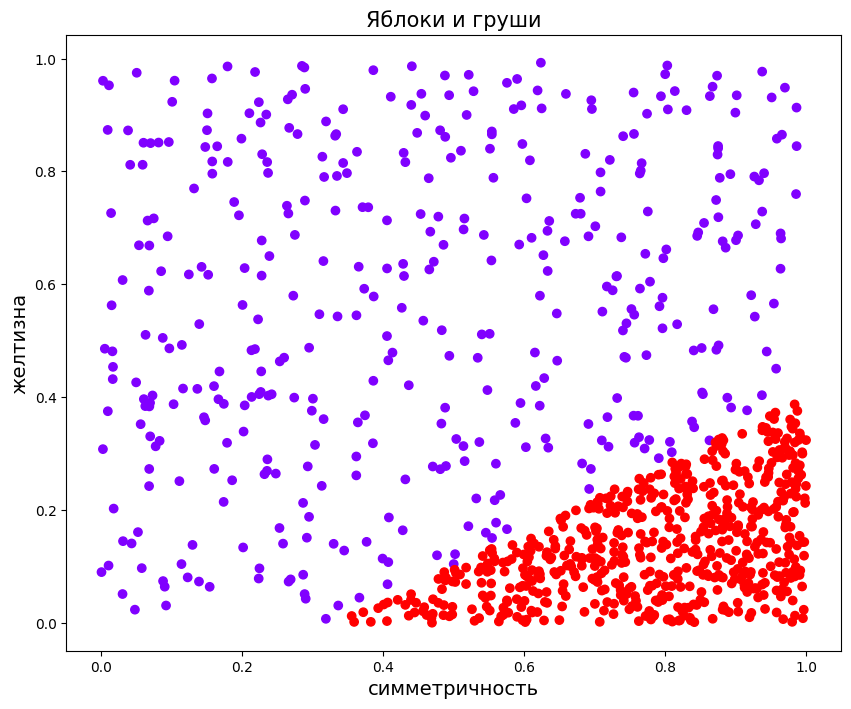

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [4]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

В модуле torch.nn лежат все необходимые вещи для конструирования нейроных сетей, а в модуле torch.optim - для выбора метода оптимизации нейросети:

In [5]:
import torch
from torch.nn import Linear, Sigmoid

Есть **два пути объявления нейросетей** в PyTorch:  
- ***функциональный (`Functional`);***
- ***последовательный (`Sequential`);***

Рассмотрим второй путь (он чуть более user-friendly) и построим таким способом один нейрон (точно такой же, который мы реализовывали раньше с помощью Numpy):

In [9]:
X

array([[0.77942731, 0.25730527],
       [0.77700501, 0.0159154 ],
       [0.97709225, 0.30420962],
       ...,
       [0.92721921, 0.13498618],
       [0.01582991, 0.48132194],
       [0.96796389, 0.30857107]])

In [7]:
y

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

In [11]:
num_features = X.shape[1]

neuron = torch.nn.Sequential(
    Linear(num_features, out_features=1),
    Sigmoid()
)

In [12]:
neuron

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

Пока что мы просто создали объект класса `Sequential`, который состоит из одного линейного слоя размерности (num_features, 1) и последующего применения сигмоиды. Но уже сейчас его можно применить к объекту (тензору), просто веса в начале инициализирутся случайно и при forward_pass'е мы получим какой-то ответ пока что необученного нейрона:

In [13]:
neuron(torch.autograd.Variable(torch.FloatTensor([1, 1])))

tensor([0.6135], grad_fn=<SigmoidBackward0>)

Предскажем ещё не обученным нейроном:

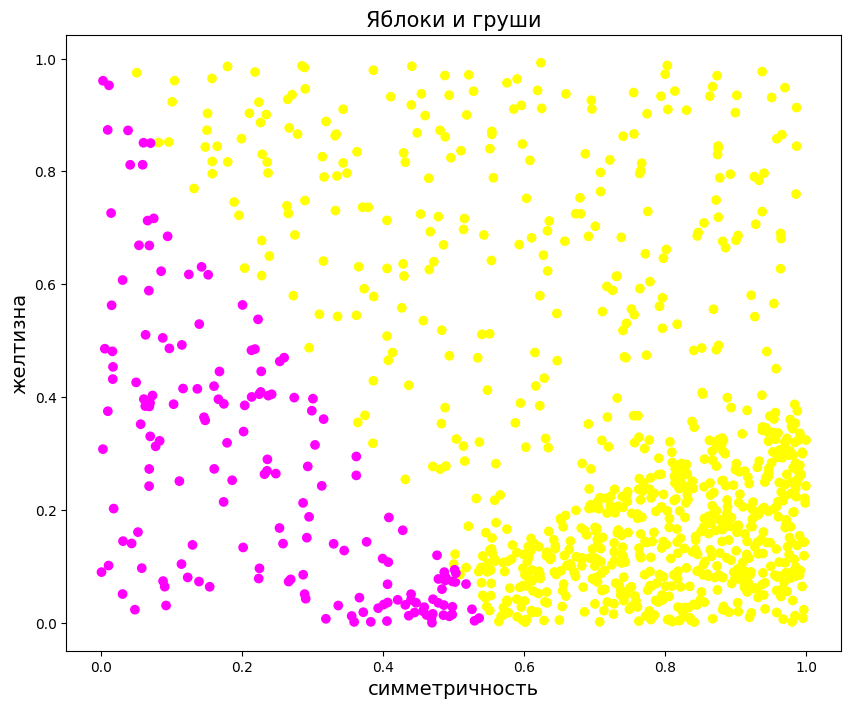

In [14]:
proba_pred = neuron(torch.autograd.Variable(torch.FloatTensor(X)))
y_pred = proba_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Как и ожидалось, ничего полезного. Давайте научим нейрон отличать груши от яблок по их симметричности и желтизне!

Обернём данные в `torch.Tensor`'ы, а тензоры в `torch.Variable`'ы, чтобы можно было вычислять градиенты по весам:

In [15]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.FloatTensor(y))

Код обучения одного нейрона на PyTorch:

In [16]:
# квадратичная функция потерь (можно сделать другую, например, LogLoss)
loss_fn = torch.nn.MSELoss(size_average=False)

# шаг градиентного спуска (точнее -- метода оптимизации)
learning_rate = 0.001  # == 1e-3
# сам метод оптимизации нейросети (обычно лучше всего по-умолчанию работает Adam)
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
# итерируемся num_epochs раз, здесь 500
for t in range(500):
    # foward_pass() -- применение нейросети (этот шаг ещё называют inference)
    y_pred = neuron(X)

    # выведем loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # обнуляем градиенты перед backard_pass'ом (обязательно!)
    optimizer.zero_grad()

    # backward_pass() -- вычисляем градиенты loss'а по параметрам (весам) нейросети
    # этой командой мы только вычисляем градиенты, но ещё не обновляем веса
    loss.backward()

    # а тут уже обновляем веса
    optimizer.step()

0 241.57823181152344
1 236.05479431152344
2 231.23092651367188
3 226.89723205566406
4 222.9119415283203
5 219.18038940429688
6 215.63999938964844
7 212.24977111816406
8 208.9828643798828
9 205.82171630859375
10 202.75494384765625
11 199.7750244140625
12 196.87689208984375
13 194.0570068359375
14 191.312744140625
15 188.64205932617188
16 186.04310607910156
17 183.5142822265625
18 181.05404663085938
19 178.66078186035156
20 176.3328857421875
21 174.0687713623047
22 171.86680603027344
23 169.72532653808594
24 167.64263916015625
25 165.61712646484375
26 163.6470489501953
27 161.73080444335938
28 159.8667449951172
29 158.05322265625
30 156.28868103027344
31 154.57150268554688
32 152.90020751953125
33 151.2733154296875
34 149.6893310546875
35 148.14688110351562
36 146.64454650878906
37 145.18104553222656
38 143.75503540039062
39 142.36534118652344
40 141.01068115234375
41 139.6898956298828
42 138.40191650390625
43 137.1455841064453
44 135.91990661621094
45 134.72381591796875
46 133.556396484

/Users/nascela/opt/anaconda3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Нейрон обучен, теперь выполним классфикацию с его помощью:

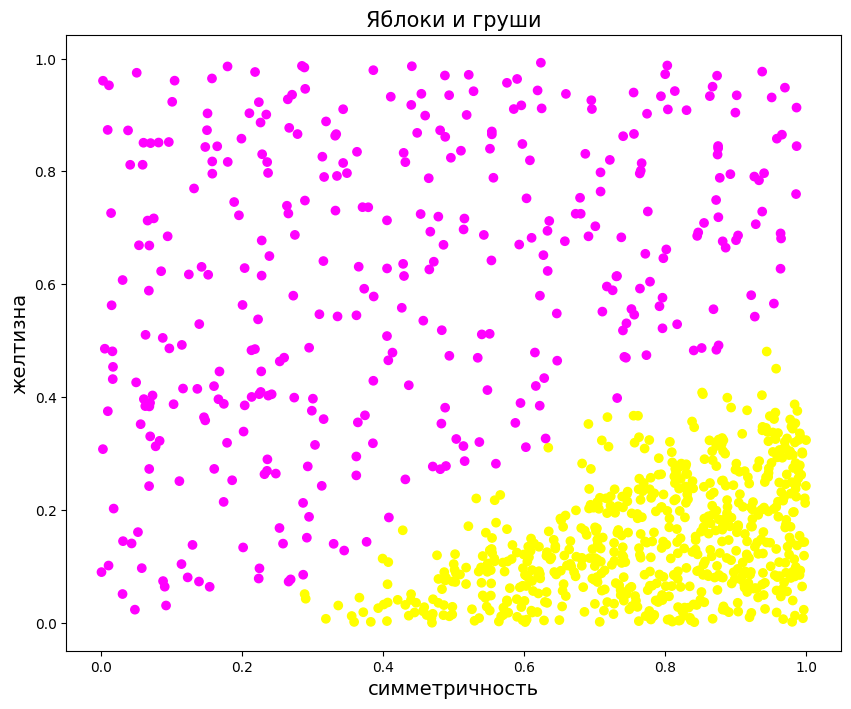

In [17]:
proba_pred = neuron(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Можно добиться лучшего качества работы путём изменения `learning_rate` и количества итераций (возможно, еще функции потерь и функции активации). Рекомендуется самостоятельно поэкспериментировать с функцией потерь `torch.nn.NLLLoss()` или `torch.nn.CrossEntropy()`.

---

Обученный нейрон работет, отличает яблоки от груш. Давайте попробуем более сложную выборку данных, которая уже не разделяется линейно:

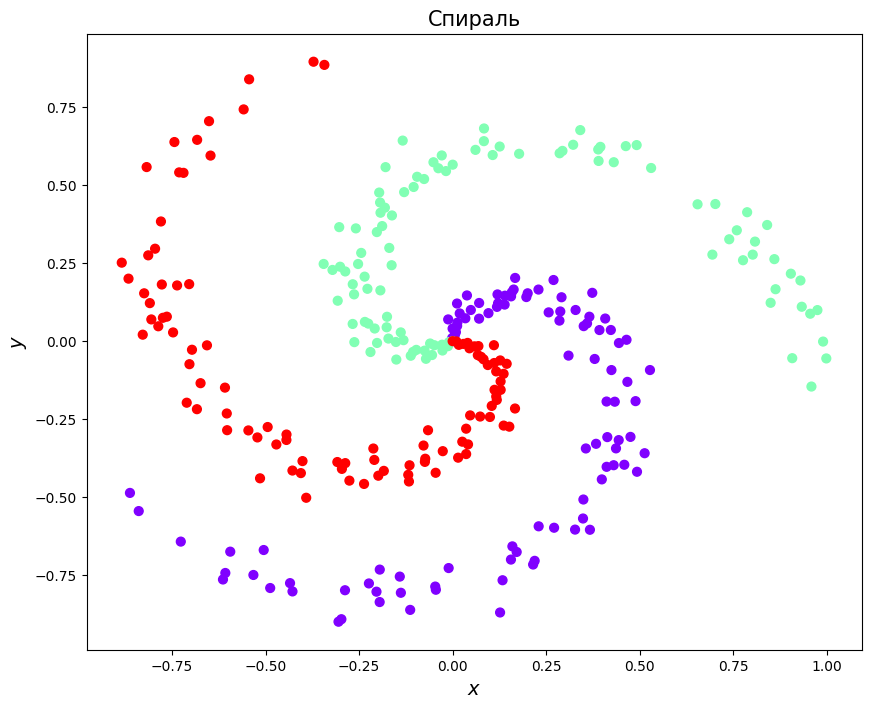

In [18]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Обработаем данные как и ранее ("оборациваем" в Variable()):

In [19]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [20]:
print(X.data.shape, y.data.shape)

torch.Size([300, 2]) torch.Size([300])


Попробуем нейрон с сигмоидой на линейно неразделимой выборке (точнее в данном случае это уже 3 нейрона с софтмаксом):

In [21]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# D_out - размерность выходного слоя (суть -- количество классов)
N, D_in, D_out = 64, 2, 3

neuron = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
for t in range(500):
    # forward
    y_pred = neuron(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # зануляем градиенты с предыдущего шага
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем веса 
    optimizer.step()

0 355.3002014160156
1 354.48895263671875
2 353.6885986328125
3 352.8987731933594
4 352.1193542480469
5 351.3502502441406
6 350.5911865234375
7 349.8420715332031
8 349.1026611328125
9 348.3728332519531
10 347.6524353027344
11 346.94122314453125
12 346.2391662597656
13 345.54608154296875
14 344.8617858886719
15 344.18609619140625
16 343.5188903808594
17 342.860107421875
18 342.2095642089844
19 341.5670471191406
20 340.9325256347656
21 340.3057861328125
22 339.6867980957031
23 339.0753173828125
24 338.47125244140625
25 337.8745422363281
26 337.2850036621094
27 336.7025451660156
28 336.1270446777344
29 335.558349609375
30 334.9964294433594
31 334.4411315917969
32 333.89227294921875
33 333.349853515625
34 332.81378173828125
35 332.2838439941406
36 331.760009765625
37 331.2421569824219
38 330.7302551269531
39 330.22412109375
40 329.72369384765625
41 329.2288818359375
42 328.7395935058594
43 328.2557678222656
44 327.7772216796875
45 327.30401611328125
46 326.8359375
47 326.3729553222656
48 32

/Users/nascela/opt/anaconda3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [22]:
# Переводим обратно в Numpy для отрисовки
X = X.data.numpy()
y = y.data.numpy()

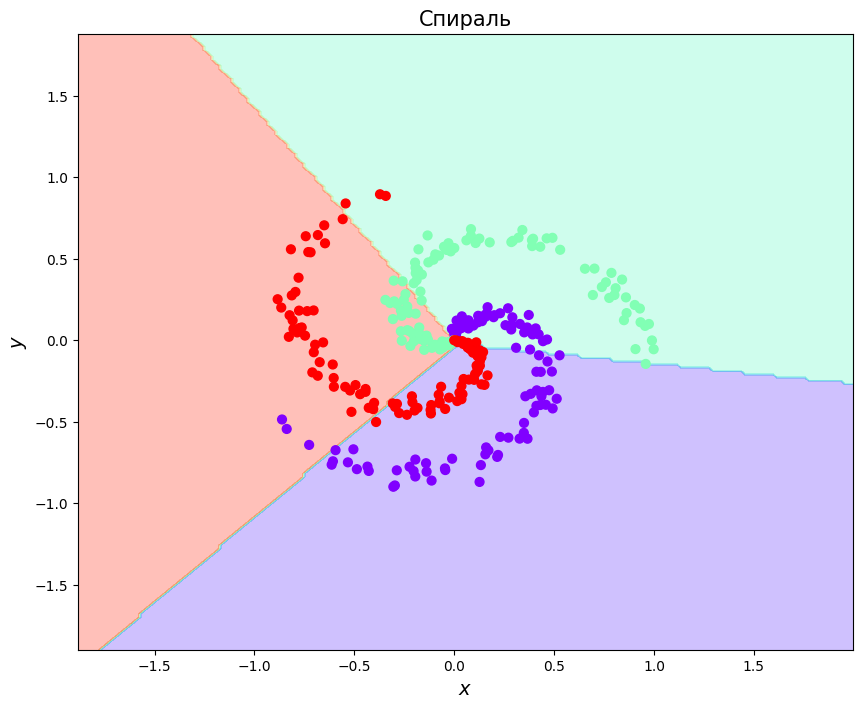

In [23]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = neuron(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Полученный результат оставляет желать лучшего. Очевидно, что единичные нейроны не способны адекватно обработать подобные данные. Для этого необходимо использовать многослойную нейросеть, которую мы реализуем далее.

Cоздадим двухслойную нейросеть из 100 нейронов

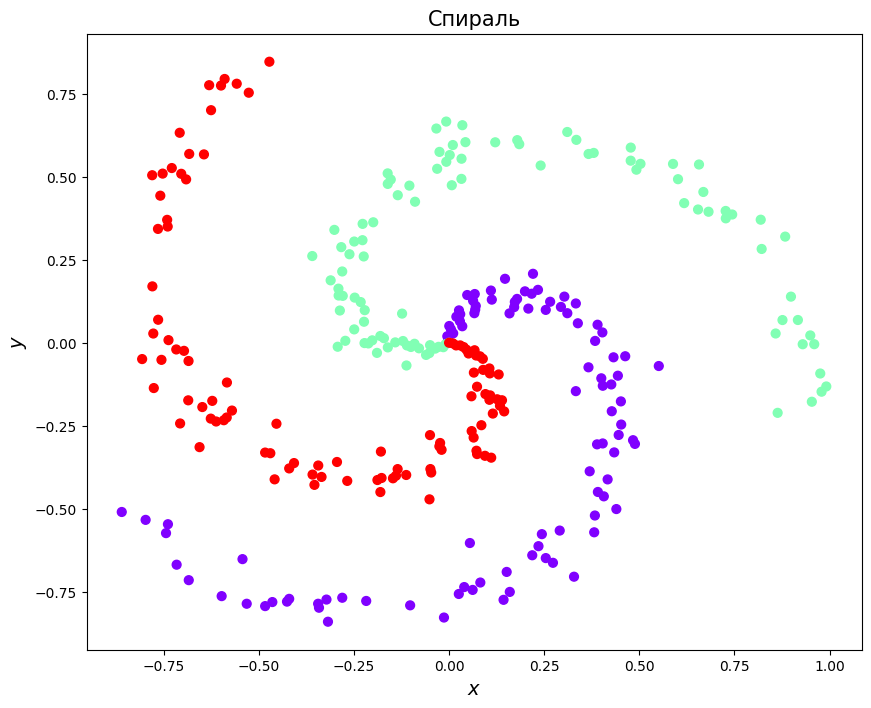

In [24]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

In [25]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [26]:
print(X.data.shape, y.data.shape)

torch.Size([300, 2]) torch.Size([300])


In [27]:
# N - размер батча (batch_size, нужно для метода оптимизации); 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 2, 100, 3

# Use the nn package to define our model and loss function.
two_layer_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(two_layer_net.parameters(), lr=learning_rate)
for t in range(500):
    # forward
    y_pred = two_layer_net(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # зануляем градиенты (чтобы не было остатка с редыдущего шага)
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем
    optimizer.step()

/Users/nascela/opt/anaconda3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 326.94677734375
1 324.74017333984375
2 322.6107177734375
3 320.5527648925781
4 318.5613708496094
5 316.63232421875
6 314.76202392578125
7 312.9469909667969
8 311.1844482421875
9 309.4718933105469
10 307.806884765625
11 306.1873474121094
12 304.61126708984375
13 303.0768127441406
14 301.5824890136719
15 300.126708984375
16 298.70794677734375
17 297.3249816894531
18 295.9765319824219
19 294.6614074707031
20 293.3785400390625
21 292.1268005371094
22 290.9050598144531
23 289.7123107910156
24 288.5477294921875
25 287.4103698730469
26 286.2994384765625
27 285.2141418457031
28 284.1536560058594
29 283.1171569824219
30 282.1040344238281
31 281.11358642578125
32 280.1451416015625
33 279.19781494140625
34 278.27117919921875
35 277.36456298828125
36 276.4773254394531
37 275.60894775390625
38 274.7589111328125
39 273.9266357421875
40 273.11175537109375
41 272.31365966796875
42 271.531982421875
43 270.7662658691406
44 270.0161437988281
45 269.28106689453125
46 268.56060791015625
47 267.8545837402

Обратите внимание: несмотря на то, что это задача 3-х классовой классификации и столбец  𝑦  лучше кодировать OneHotEncoding'ом, мы подали просто столбец из 0, 1 и 2 и всё отработало. Дело в том, что PyTorch сам делает OneHot в таком случае.

Проверим, насколько хороша наша сеть из 100 нейронов:

In [28]:
# Обратно в Numpy для отрисовки
X = X.data.numpy()
y = y.data.numpy()

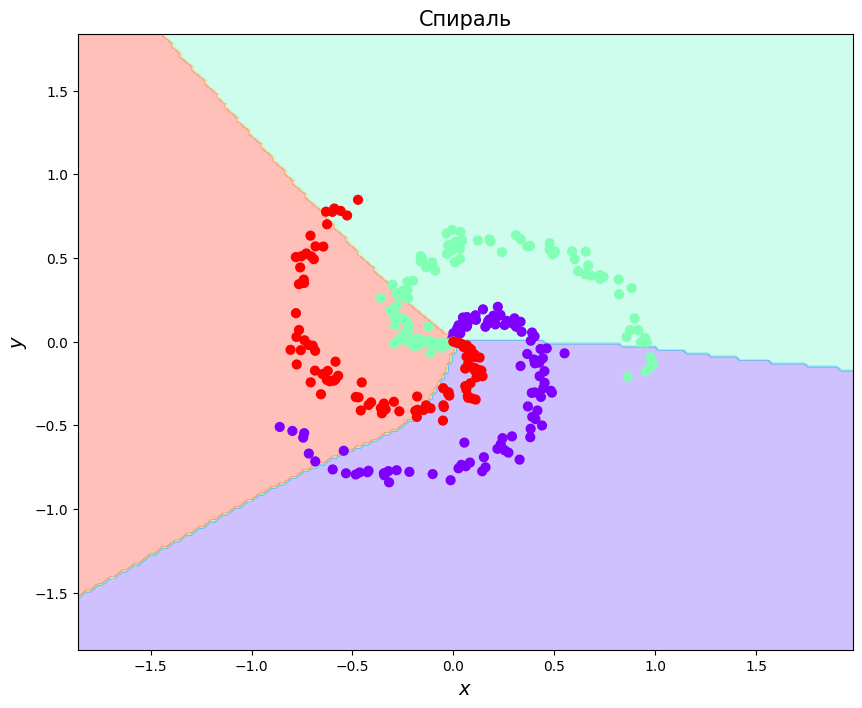

In [29]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = two_layer_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

По сравнению с одиночными нейронами конечно же есть разница, но результат очень далек от идеального.

Для получения лучшего результата необходимо выполнить подбор наиболее оптимальных гиперпараметров

In [30]:
X = torch.autograd.Variable(torch.FloatTensor(X))
y = torch.autograd.Variable(torch.LongTensor(y.astype(np.int64)))

In [31]:
N, D_in, H, D_out = 64, 2, 100, 3

better_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-3
optimizer = torch.optim.SGD(better_net.parameters(), lr=learning_rate)
for t in range(1000):
    # forward
    y_pred = better_net(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # зануляем градиенты (чтобы не было остатка с редыдущего шага)
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем
    optimizer.step()

/Users/nascela/opt/anaconda3/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 331.63800048828125
1 329.6226501464844
2 327.8832702636719
3 326.3262023925781
4 324.8992919921875
5 323.5274963378906
6 322.15289306640625
7 320.7601013183594
8 319.2795104980469
9 317.7059631347656
10 316.00152587890625
11 314.15277099609375
12 312.1678466796875
13 310.04815673828125
14 307.76922607421875
15 305.2691955566406
16 302.5074157714844
17 299.48345947265625
18 296.203125
19 292.6215515136719
20 288.7036437988281
21 284.4903869628906
22 280.0895690917969
23 275.5731506347656
24 270.901123046875
25 266.1103210449219
26 261.2825012207031
27 256.4537048339844
28 251.70181274414062
29 247.0981903076172
30 242.70069885253906
31 238.5862579345703
32 234.8294677734375
33 231.6314697265625
34 229.5003662109375
35 230.5460968017578
36 238.7364044189453
37 273.6632995605469
38 287.633056640625
39 306.2126770019531
40 231.1466064453125
41 224.7907257080078
42 219.85450744628906
43 216.13380432128906
44 213.17066955566406
45 210.820068359375
46 209.07801818847656
47 208.5648956298828

Судя по значениям метрики все дожно быть идеально.

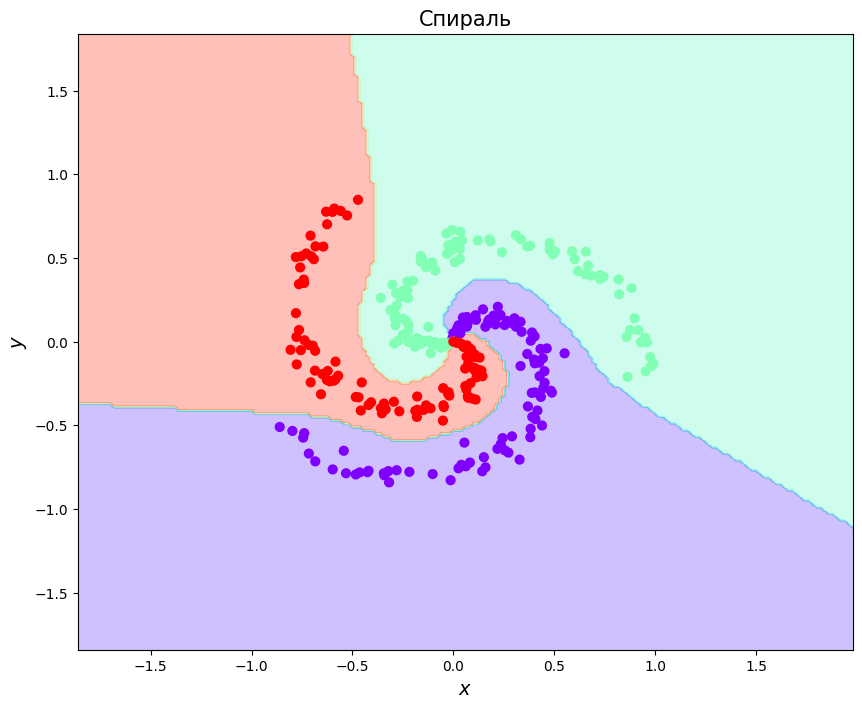

In [32]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = better_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

**Дополнительное задание:** Найдите те параметры, которые были изменены и решение стало более адекватным, попробуйте изменить эти параметры и и получить результаты, отличные от представленных выше.